# **DIGIT HANDWRITING CLASSIFICATION**

## Abstract
The problem of handwritten digit recognition has long been an open problem in the field of pattern classification. A ton of studies have shown that Neural networks, machine learning have great and efficient performance. In data classification Deep learning and Neural Network algorithms are a branch of Machine learning that can automatically identify patterns in the data, and then use the uncovered patterns to predict future data, or to perform other alternative kinds of decision making under unreliability Deep Learning algorithms are used to model high level abstractions in data.

## Problem Statement
In this notebook our aim will be to build simple K-Nearest Neighbor Model to predict the digit in each
image.

## Importing dependencies

In [1]:
import pandas as pd
import numpy as np
from PIL import Image
from sklearn import *

## Load Dataset

You can find the dataset from git repo : [Get Dataset](https://github.com/CosmiX-6/Supervised-Machine-Learning-Solved/raw/master/Digit%20Handwriting%20Classification/output/processed_dataset/mnist_digit_data.csv) << Click to download

Size of data size is 74.5Mb

In [2]:
# code to get digit dataset
df = pd.read_csv('https://raw.githubusercontent.com/CosmiX-6/Supervised-Machine-Learning-Solved/master/Digit%20Handwriting%20Classification/output/processed_dataset/mnist_digit_data.csv')

In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,target
0,3,0,0,3,7,3,0,3,0,11,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,8,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,9,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0


Initializing variable for Independent and Dependent data.

In [4]:
Xdata = df.iloc[:,:-1]
Ydata = df.iloc[:, -1]

In [5]:
# split the data for training and testing
x_train, x_test, y_train, y_test = model_selection.train_test_split(Xdata,Ydata,test_size = 0.2, random_state = 1)

## Modelling

In this book we are going to make use of KNN model.

KNN: K Nearest Neighbor is one of the fundamental algorithms in machine learning. Machine learning models use a set of input values to predict output values. KNN is one of the simplest forms of machine learning algorithms mostly used for classification. It classifies the data point on how its neighbor is classified.

In [6]:
from sklearn.neighbors import KNeighborsClassifier

Let's fnd the best value for n_neighbor parameter.

#### Program to calculate best value for n_neighbor

###### This code can take upto couple of hour to complete the execution

In [7]:
# storing score
train_score=[]
test_score=[]

# range of neighbors
K =  np.arange(1,20)

for k in K:
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(x_train,y_train)
    y_train_pred = clf.predict(x_train)
    y_test_pred = clf.predict(x_test)
    
    # calculate score
    f1_train = metrics.f1_score(y_train,y_train_pred,average='macro')
    f1_test = metrics.f1_score(y_test,y_test_pred,average='macro')
    
    # storing scores
    train_score.append(f1_train)
    test_score.append(f1_test)

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

#### Plotting train and test result comparison

In [9]:
# score comparison plot
sns.lineplot(x=range(1,20), y=train_score, color="red")
sns.lineplot(x=range(1,20), y=test_score, color="blue")

plt.xticks(np.arange(1,20, 2))

plt.title("Train V/s Test score")
plt.xlabel("Neighbor")
plt.ylabel("Score")

plt.show()

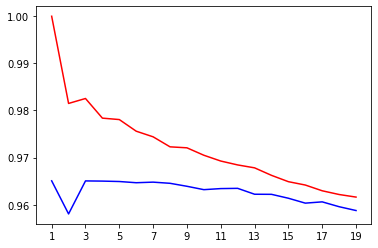

So, In above graph we can find that somewhere between 11 and 13 our model perform good and then the score starts decreasing.

In [10]:
# modelling
clf = KNeighborsClassifier(n_neighbors=11)
clf.fit(x_train,y_train)

y_train_pred = clf.predict(x_train)
y_test_pred = clf.predict(x_test)

In [11]:
# model score
f1_train = metrics.accuracy_score(y_train,y_train_pred)
f1_test = metrics.accuracy_score(y_test,y_test_pred)
cvs = np.mean(model_selection.cross_val_score(clf, x_train, y_train, scoring='f1_macro', cv=5))
(f1_train, f1_test, cvs)

(0.9693154761904762, 0.9635714285714285, 0.9586294430244292)

In [12]:
f1_train = metrics.accuracy_score(y_train,y_train_pred)
f1_test = metrics.accuracy_score(y_test,y_test_pred)
cvs = np.mean(model_selection.cross_val_score(clf, x_train, y_train, scoring='f1_macro', cv=5))
(f1_train, f1_test, cvs)

(0.9693154761904762, 0.9635714285714285, 0.9586294430244292)

**Predicting with random image**

In [13]:
img = Image.open('MNIST_6_0.png').convert('L')
clf.predict(np.array(img).reshape(1,-1))

array([5], dtype=int64)

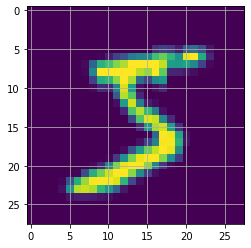

In [14]:
plt.imshow(img)
plt.grid('off')

## Conclusion:

The notebook has practised machine learning techniques to obtain the appropriate digit recognition.

<h3>Author</h3>
<h4>Akash Sharma</h4>
<div style="float:left">
  <a href="https://www.linkedin.com/in/akash-sharma-01775b14a">
    <img src="https://img.shields.io/badge/LinkedIn-0077B5?style=for-the-badge&logo=linkedin&logoColor=white" alt="LinkedIn">
  </a>
  <a href="https://discord.com/users/366283102462541865">
    <img src="https://img.shields.io/badge/Discord-7289DA?style=for-the-badge&logo=discord&logoColor=white" alt="Discord">
  </a>
  <a href="https://github.com/CosmiX-6">
    <img src="https://img.shields.io/badge/GitHub-100000?style=for-the-badge&logo=github&logoColor=white" alt="GitHub">
  </a>
</div>